# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (18)

**30/01/2023**

## Aplicar un caso de uso (*Clasificación*)

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Dataset de cubierta forestal

**[Forest Covertype data](https://archive.ics.uci.edu/ml/datasets/Covertype)** es un conjunto de datos cargado en la librería _sklearn_ que permite realizar un ejercicio tipo problemas de **clasificación**. El objetivo de este dataset es **estudiar las variables cartográficas** para poder **predecir el tipo de cubierta forestal**. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del **Servicio Forestal de EE.UU. (USFS)**. 

Los datos están en forma **cruda** (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan **bosques con mínimas perturbaciones causadas por el hombre**, por lo que los tipos de cubierta forestal existentes son más el **resultado de procesos ecológicos**, que de prácticas de gestión forestal.

### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [3]:
from sklearn.datasets import fetch_covtype

# Construimos un dataframe con los datos medidos de la cubierta forestal
dataset_cub = pd.DataFrame(fetch_covtype()["data"], columns=fetch_covtype()["feature_names"])

# Añadimos la variable objetivo
dataset_cub['target'] = fetch_covtype()["target"]

dataset_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Vamos a sacar un dataset mucho más pequeño para **simplificar los cálculos** y **reducir el tiempo de computación** de los algoritmos. Una primera idea para extraer un subconjunto podría ser quedarnos por ejemplo con los **_100.000_ primeros registros** de la tabla.

In [4]:
dataset_cub[0:100000]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3100.0,52.0,16.0,376.0,50.0,3816.0,227.0,203.0,105.0,4295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99996,3090.0,50.0,16.0,361.0,40.0,3840.0,225.0,202.0,106.0,4268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99997,3083.0,45.0,18.0,335.0,33.0,3864.0,222.0,198.0,104.0,4241.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99998,3077.0,41.0,15.0,309.0,43.0,3889.0,221.0,205.0,116.0,4214.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


El posible peligro de este enfoque es que **no obtengamos un subconjunto muy representativo**. Realizamos una consulta sobre una de las variables del datset para ver si estadísticamente tienen las mismas características o no. 

In [5]:
dataset_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

In [6]:
dataset_cub[0:100000]['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2862.036680
std         231.376584
Name: Elevation, dtype: float64

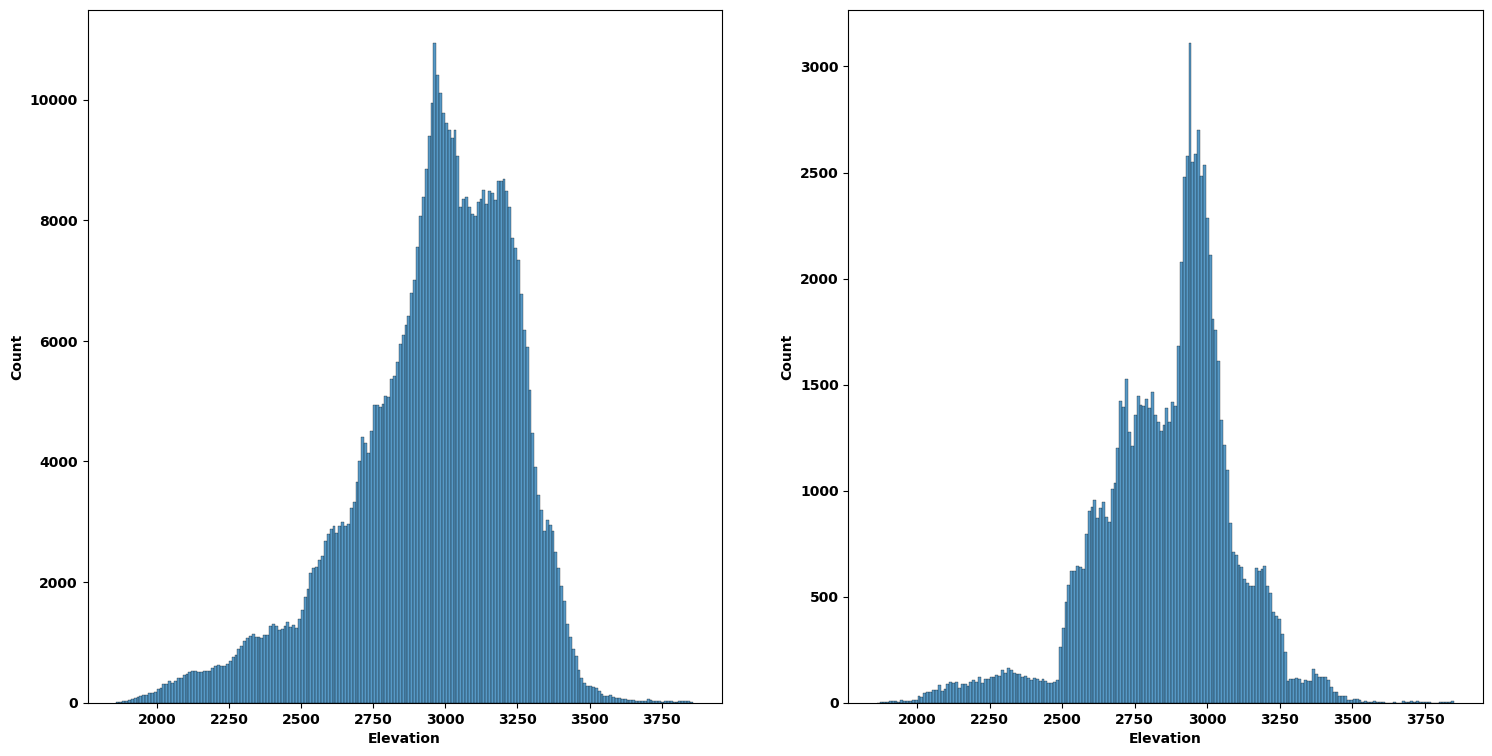

In [7]:
# Comparar la distribución de la variable "Elevation" entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(dataset_cub[0:100000]['Elevation'], bins=200, ax=axes[1])
plt.show()

Se puede observar que la variable analizada no tiene la misma representación en el subconjunto de los _100.000_ primeros registros del dataset. Otra opción para conseguir un trozo de los datos originales, sería aplicar la técnica de **remuestro aleatorio (_random resampling_)**.

Vamos a hacer un remuestreo aleatorio para **quedarnos aproximadamente con el 17% de los datos** usando el método **[sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)** sobre los _DataFrames_ de la librería _pandas_:

In [8]:
100/6

16.666666666666668

In [9]:
df_cub = dataset_cub.sample(frac=1/5.81012, random_state=222).reset_index(drop=True)
df_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [10]:
# Consultamos las principales esdadísticas de la variable analizada anteriormente
df_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2959.010060
std         279.864034
Name: Elevation, dtype: float64

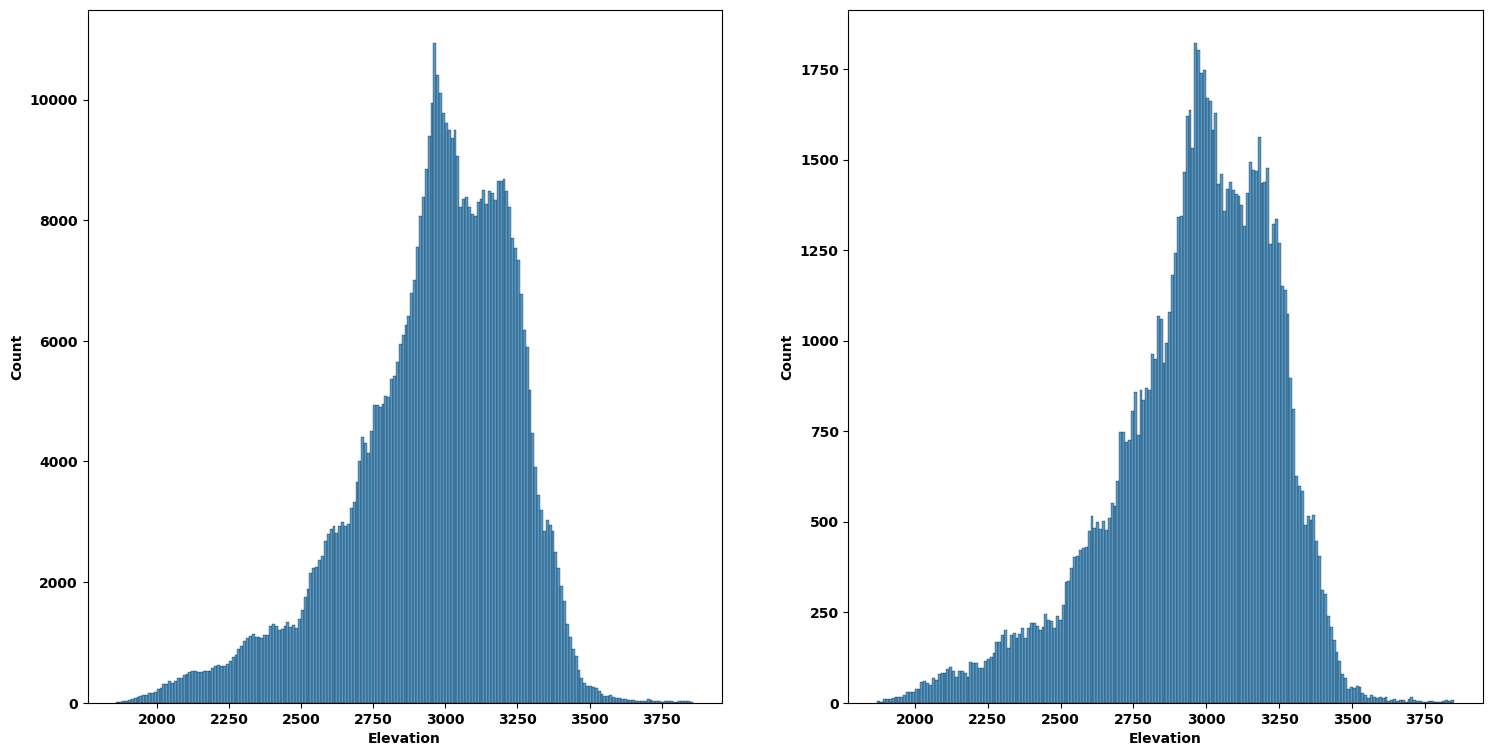

In [11]:
# Comparar la distribución de la variable "Elevation" entre el DataFrame original y el subconjunto obtenido mediante el remuestreo aleatorio
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(df_cub['Elevation'], bins=200, ax=axes[1])
plt.show()

Podemos ver que este último subconjunto, a pesar de tener solamente 17% de los datos, **sí que incluye un set de observaciones muy representativas** respecto al dataset original. 

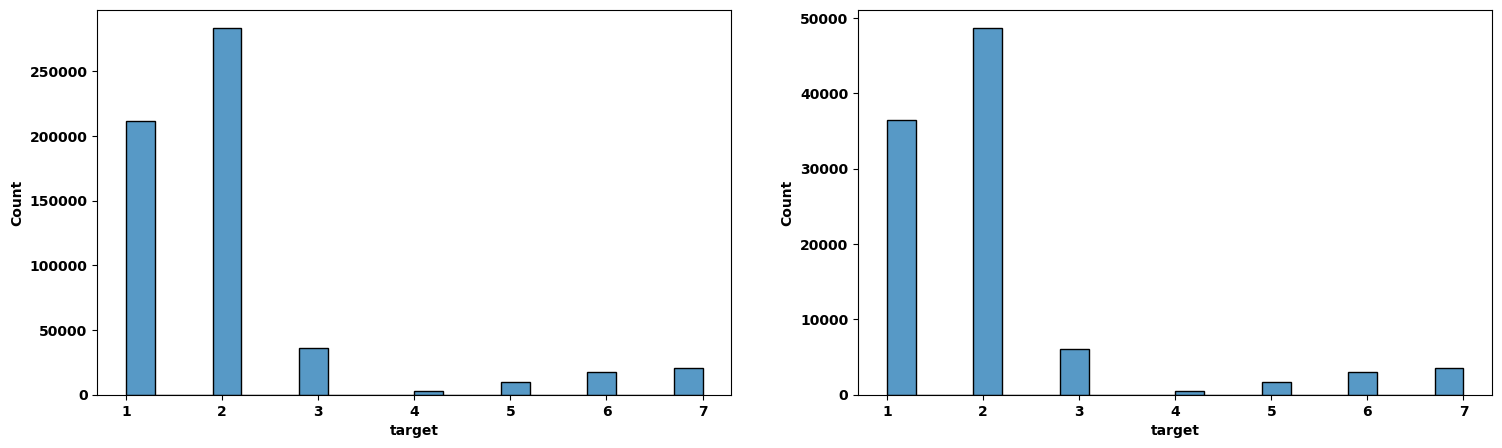

In [12]:
# Comparar la distribución de la variable objetivo entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(dataset_cub['target'], bins=20, ax=axes[0])
sns.histplot(df_cub['target'], bins=20, ax=axes[1])
plt.show()

In [13]:
df_cub.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,2959.010060,155.927130,14.078440,268.415310,45.890660,2356.444880,212.226180,223.392060,142.541110,1984.702670,...,0.091120,0.078660,0.003050,0.003510,0.000190,0.000510,0.026360,0.023650,0.014600,2.05919
std,279.864034,111.880189,7.466349,212.389266,57.923415,1559.881883,26.567206,19.768911,38.116316,1328.355754,...,0.287781,0.269209,0.055143,0.059141,0.013783,0.022578,0.160204,0.151957,0.119946,1.40864
min,1871.000000,0.000000,0.000000,0.000000,-164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2810.000000,59.000000,9.000000,108.000000,7.000000,1110.000000,198.000000,213.000000,119.000000,1022.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,2995.000000,127.000000,13.000000,218.000000,29.000000,2005.000000,218.000000,226.000000,143.000000,1712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
75%,3163.000000,261.000000,18.000000,384.000000,68.000000,3336.000000,231.000000,237.000000,168.000000,2553.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
max,3849.000000,360.000000,66.000000,1390.000000,592.000000,7117.000000,254.000000,254.000000,253.000000,7168.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.00000


In [14]:
df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           100000 non-null  float64
 1   Aspect                              100000 non-null  float64
 2   Slope                               100000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    100000 non-null  float64
 4   Vertical_Distance_To_Hydrology      100000 non-null  float64
 5   Horizontal_Distance_To_Roadways     100000 non-null  float64
 6   Hillshade_9am                       100000 non-null  float64
 7   Hillshade_Noon                      100000 non-null  float64
 8   Hillshade_3pm                       100000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  100000 non-null  float64
 10  Wilderness_Area_0                   100000 non-null  float64
 11  Wilderness_Area_1          

In [15]:
# Conteo de valores perdidos/faltantes  
df_cub.isna().sum().sum()

0

In [16]:
# Consultamos los registros que tienen algún valor nulo
df_cub.drop(df_cub.dropna().index)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target


### Reducción de Variables (___Dimensionality Reduction___)

### **`Ejercicio 18.1`**

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de **Selección de variables basada en árbol de decisión** mediante las importancias de cada variable (**`Decision Trees Importances`**):

- Filtra el tablón para quedarnos solamente con **las variables que aglutinan hasta el `95%` de la información** que se requiere para estimar la variable objetivo.
- `random_state=100`

---

### **`Ejercicio 18.2`**

Después de filtrar el dataset vamos a plantear un **problema de clasificación** para conseguir un **clasificador de la cubierta forestal** en basea a las **variables cartográficas**.:  

**`18.2.1`** Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.  

**`18.2.2`** Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de `0` a `1`
- Convertir la variable objetivo en valores numéricos **entre 0 y el número de clases menos 1**

---

### **`Ejercicio 18.3`**

Después de estandarizar los datos procedemos a crear el **primer clasificador**:  

**`18.3.1`** Divide el datset en _training_ y en _test_:
- Guarda el `20%` de los datos para testeo.
- `random_state=100`  

**`18.3.2`** Entrena un modelo de **regresión logística**:
- Número máximo de iteraciones igual a `1000`
- `random_state=100`

**`18.3.3`** Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- Confusion matrix

---

### **`Ejercicio 18.4`**

Ahora probamos la creación de otros modelo basados en **árboles de decisión**:  

**`18.4.1`** Entrena un modelo tipo **Decision Tree Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.4.2`** Saca la curva de complejidad del modelo _Decision Tree_ (**Model Complexity Curve**) y crea un nuevo clasificador **con el valor óptimo de la profundidad del árbol** según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.
- `random_state=100`
- rango de profundidades:  de `2` a `30` __inclusive__

**`18.4.3`** Saca la gráfica de el *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

---

### **`Ejercicio 18.5`**

Ahora probamos la creación de otros modelo basados en **bosques aleatorios**:  

**`18.5.1`** Entrena un modelo tipo **Random Forest Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.5.2`** Consulta la profundidad de todos los árboles del bosque creado en el paso anterior y calcula la mediana de este parámetro.

**`18.5.3`** Saca las curvas de complejidad del modelo _Random Forest_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[200, 250, 300, 350, 400]`  
- rango de profundidades:  de `20` a `40` __inclusive__ en pasos de 2 en 2.
- considera estas opciones para _max_features_ : `["auto", "log2", None]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- **OOB** (out-of-bag score)

**`18.5.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

---

### **`Ejercicio 18.6`**

Ahora probamos la creación de otros modelo basados en **Gradient Boosting**:  

**`18.6.1`** Entrena un modelo tipo **XGBoost Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.6.2`** Consulta el número y la profundidad máxima de los árboles del bosque creado en el paso anterior.

**`18.6.3`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- rango de profundidades:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.6.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

---

### **`Ejercicio 18.7`**

Ahora probamos la creación de otros modelo basados en **métodos Bayesianos**:  

**`18.7.1`** Entrena un modelo para cada tipo de algoritmos Bayesianos y calcula las métricas correspondientes para analizar sus rendimientos en comparación con los modelos anteriores:
- `GaussianNB`
- `MultinomialNB`
- `ComplementNB`
- `BernoulliNB`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.7.2`** Saca la gráfica del *Learning Curve* para el modelo `GaussianNB` y explica si este modelo sufre de un posible "_Overfitting_" o "_Underfitting_" comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

---

### **`Ejercicio 18.8`**

Ahora probamos la creación de otros modelo basados en **K vecinos más cercanos**:  

**`18.8.1`** Entrena un modelo tipo **K-Nearest Neighbors** con la configuración por defecto y otros dos modelos con `1` y `100` vecinos más cercanos. Calcula las métricas correspondientes para analizar sus rendimientos en comparación con el modelo anteriores:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.8.2`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro analizado como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- (*Sugerencia*: No incluya más de 5 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

---

### **`Ejercicio 18.9`**

Ahora probamos la creación de otros modelo basados en **Redes Neuronales**:  

**`18.9.1`** Entrena un modelo tipo **MLPClassifier** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`


**`18.9.2`** Entrena otro modelo tipo _MLPClassifier_ indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`

**`18.9.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (**DNN**-Deep Neural Networks) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 40`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.5`** Saca la gráfica del *Learning Curve* para este último modelo y explica si tiene preferencia o no, comparando con modelos anteriores.
- `semilla = 883`
- `epochs = 40`
- `batch_size=8000`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- (*Sugerencia*: No incluya más de **5** puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)